This program preditics if a passenger will surviive on the titanic

In [ ]:
# import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# load  the data
titanic =sns.load_dataset('titanic')
#print first five rows
titanic.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


By checking the first few rows we see that some column are redundant such as pclass and class, embarked and embarked_town they seem to have the same data just in different format. so we see a chance of making our data simpler by reducing the number of columns. we do it later in the code

In [ ]:
# counting the number of rows and column 
titanic.shape

(891, 15)

In [ ]:
# get some statics, only column having numerical data 

titanic.describe()


,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# get a count of  the number of survivours
titanic['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


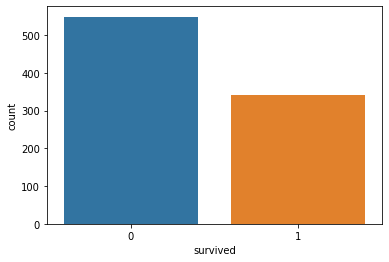

In [ ]:
# visualise the count of the survivors per category 0 for not survived and 1 fr survived
sns.countplot(titanic['survived'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

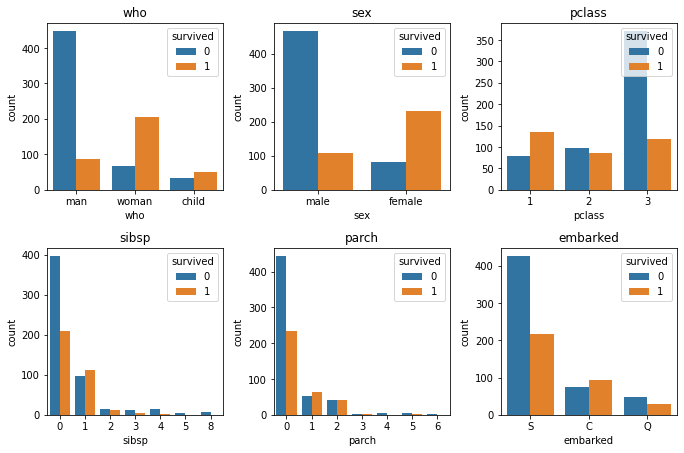

In [ ]:
# visualised survivors according to  coulmns who(adult male ,adult female etc) sex, pclass(class with number),
#sibsp(sibling or spouse), parch(parent or child), embarked(where the passenger embarked from)
cols=['who','sex','pclass','sibsp','parch','embarked']
n_rows =2
n_cols=3
# subplot grid and figure size of each graph
fig, axs= plt.subplots(n_rows,n_cols, figsize = (n_cols * 3.2,n_rows*3.2) )
for r in range(0,n_rows):
  for c in range(0,n_cols):
    i = r*n_cols+c # index to go throgh the number of columns 
    ax= axs[r][c] # show where to position each plot
    sns.countplot(titanic[cols[i]],hue=titanic['survived'],ax=ax)
    ax.set_title(cols[i])
    ax.legend(title='survived',loc = 'upper right')
plt.tight_layout()

In [ ]:
titanic.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


In [ ]:
#look at survival rate by sex and class 
titanic.pivot_table('survived',index='sex',columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


we can see here that  female has overall higher survival rate but females from 1st and 2nd class has higher survival rate than 3rd class.

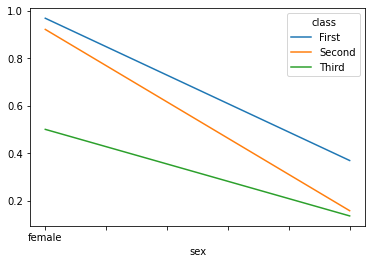

In [ ]:
#visualising  survival rate by sex and class by just adding plot function to the above code
titanic.pivot_table('survived', index='sex', columns='class').plot()

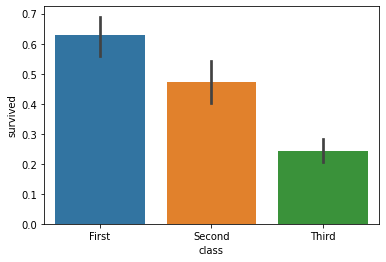

In [ ]:
#plotting the survival rate of each class 
sns.barplot(x='class',y='survived',data= titanic)

In [ ]:
# look at survival rate by sex, age and class 
age = pd.cut(titanic['age'],[0,18,80])
titanic.pivot_table('survived',['sex',age],'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

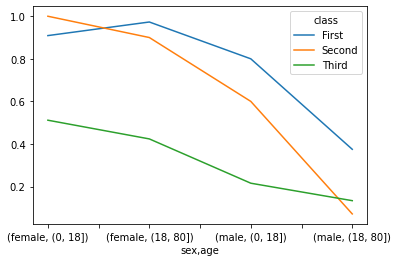

In [ ]:
titanic.pivot_table('survived',['sex',age],'class').plot()

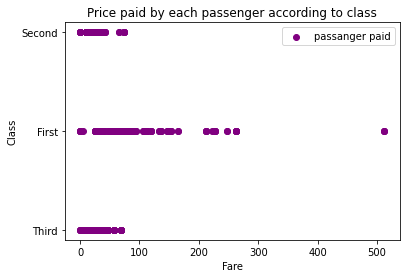

In [ ]:
plt.scatter(titanic['fare'],titanic['class'],color ='purple', label ='passanger paid')
plt.ylabel("Class")
plt.xlabel("Fare")
plt.title("Price paid by each passenger according to class")
plt.legend()
plt.show()

In [ ]:
# looking for NUll values
titanic.isna().sum ()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

#age and dec has alot of missing values
we can get ride of Deck column and 

In [ ]:
# we check the number of values in each column to see if the redudant column has the same amount of data and decide
# if we want to get ride of it 
for val in titanic:
  print(titanic[val].value_counts())
  print()

0    549
1    342
Name: survived, dtype: int64

3    491
1    216
2    184
Name: pclass, dtype: int64

male      577
female    314
Name: sex, dtype: int64

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: age, Length: 88, dtype: int64

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: sibsp, dtype: int64

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: parch, dtype: int64

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: fare, Length: 248, dtype: int64

S    644
C    168
Q     77
Name: embarked, dtype: int64

Third     491
First     216
Second    184
Name: class, dtype: int64

man      537
woman    271
child     83
Name: who, dtype: int64

True     537
False    354
Name: adult_male, dtype: int64

C    59
B    47
D    33
E    32
A    15
F    13
G     

In [ ]:
# remove the rows with missing values 
titanic=titanic.dropna(subset = ['embarked','age'])

# drop the redundant columns 

titanic = titanic.drop(['deck','embark_town', 'alive','class','who','alone','adult_male'],axis=1)

In [ ]:
# count the new number of rows and colums 
titanic.shape

(712, 8)

In [ ]:
# look at the data types 
titanic.dtypes

survived      int64
pclass        int64
sex          object
age         float64
sibsp         int64
parch         int64
fare        float64
embarked     object
dtype: object

In [ ]:
#print the unique values in columns
print(titanic['sex'].unique())
print(titanic['embarked'].unique())

['male' 'female']
['S' 'C' 'Q']


In [ ]:
# embarked is an object we needchange that 

from sklearn.preprocessing import LabelEncoder


labelencoder = LabelEncoder()
# encode the sex column 
titanic.iloc[:,2] =labelencoder.fit_transform(titanic.iloc[:,2])
# encode the embarked  column 

titanic.iloc[:,7]=labelencoder.fit_transform(titanic.iloc[:,7])

In [ ]:
# look at the data types again 
titanic.dtypes

survived      int64
pclass        int64
sex           int64
age         float64
sibsp         int64
parch         int64
fare        float64
embarked      int64
dtype: object

In [ ]:
#print the unique values in columns after encoding 
print(titanic['sex'].unique())

print(titanic['embarked'].unique())

[1 0]
[2 0 1]


In [ ]:
# split the data into independent 'X ' and 'Y' variables
X =titanic.iloc[:,1:8].values# all rows from column 1 to 8 
Y = titanic.iloc[:,0].values # survived column  which is our target 

In [ ]:
# split the data set into training and testing dataset with  80:20 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train,Y_test =train_test_split(X, Y, test_size=0.2,random_state=0)
# random state is  used  for initializing the internal random number generator, which will decide the splitting of data into train and test indices



In [ ]:
#scale the data 
from sklearn.preprocessing import StandardScaler
sc =StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [ ]:
# create a function with 
def models(X_train,Y_train):
  #use logistic regression 
  from sklearn.linear_model import LogisticRegression
  log = LogisticRegression(random_state=0)
  log.fit(X_train,Y_train)

  # use KNN
  from sklearn.neighbors import KNeighborsClassifier
  knn=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
  knn.fit(X_train,Y_train)

  # support vector (Linear kernel)
  from sklearn.svm import SVC
  svc_lin =SVC(kernel='linear',random_state = 0)
  svc_lin.fit(X_train, Y_train)

  # use SVC (RBF kernel)
  from sklearn.svm import SVC
  svc_rbf =SVC(kernel='rbf',random_state = 0)
  svc_rbf.fit(X_train, Y_train)

  # use GussianNB
  from sklearn.naive_bayes import GaussianNB
  guass = GaussianNB()
  guass.fit(X_train,Y_train)

  # use Decision Tree
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion ='entropy', random_state=0)
  tree.fit(X_train, Y_train)

  # use the RandomForestClassifier
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
  forest.fit(X_train, Y_train)

  #Print the training accuracy of each model 
  print('[0]Logistic Regression Training accuracy: ',log.score(X_train, Y_train))
  print('[1] K nearest neighboraccuracy: '          ,knn.score(X_train, Y_train))
  print('[2]Support Vector classifier Linear : '    ,svc_lin.score(X_train, Y_train))
  print('[3]SVC RBF accuracy: '                     ,svc_rbf.score(X_train, Y_train))
  print('[4]Guass Training accuracy: '              ,guass.score(X_train, Y_train))
  print('[5]Decision Tree  Training accuracy: '     ,tree.score(X_train, Y_train))
  print('[6]Random Forest Training accuracy: '      ,forest.score(X_train, Y_train))


  return log, knn, svc_lin, svc_rbf, guass, tree, forest

  

In [ ]:
# #get and train all of the models 
model = models(X_train, Y_train)

[0]Logistic Regression Training accuracy:  0.7978910369068541
[1] K nearest neighboraccuracy:  0.8664323374340949
[2]Support Vector classifier Linear :  0.7768014059753954
[3]SVC RBF accuracy:  0.8506151142355008
[4]Guass Training accuracy:  0.8031634446397188
[5]Decision Tree  Training accuracy:  0.9929701230228472
[6]Random Forest Training accuracy:  0.9753954305799648


In [ ]:
# Confusion Matrix and accuracy for all the models on test data
from sklearn.metrics import confusion_matrix
for i in range(len(model)):
  cm=confusion_matrix(Y_test,model[i].predict(X_test))
  #extract TN, FP,FN,TP
  TN, FP, FN, TP = confusion_matrix(Y_test, model[i].predict(X_test)).ravel()
  test_score = (TP+TN)/(TP+TN+FN+FP)
  print(cm)
  print('Model[{}] Testing Accuracy="{}"'.format(i,test_score))
  print()




[[75  7]
 [19 42]]
Model[0] Testing Accuracy="0.8181818181818182"

[[67 15]
 [20 41]]
Model[1] Testing Accuracy="0.7552447552447552"

[[70 12]
 [18 43]]
Model[2] Testing Accuracy="0.7902097902097902"

[[75  7]
 [22 39]]
Model[3] Testing Accuracy="0.7972027972027972"

[[69 13]
 [27 34]]
Model[4] Testing Accuracy="0.7202797202797203"

[[54 28]
 [12 49]]
Model[5] Testing Accuracy="0.7202797202797203"

[[73  9]
 [14 47]]
Model[6] Testing Accuracy="0.8391608391608392"



In [ ]:
# GET feature importance
forest = model[6]
importances =pd.DataFrame({'feature':titanic.iloc[:,1:8].columns,'importance': np.round(forest.feature_importances_,3)})
importances = importances.sort_values('importance', ascending = False).set_index('feature')
importances

,importance
feature,
age,0.300
fare,0.296
sex,0.183
pclass,0.098
sibsp,0.050
parch,0.044
embarked,0.030


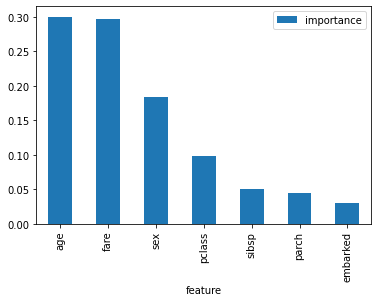

In [ ]:
# visualise the importance 
importances.plot.bar()

In [ ]:
#print the prediction of the random forest classifier
pred = model[6].predict(X_test)
print(pred)
print() # to create some white space
# print the actual values 
print (Y_test)

[1 0 1 0 0 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1
 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 1 1 0 1 1 1
 0 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 1]

[0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1
 1 1 1 1 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 0 1 1 1
 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0
 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 1]


In [ ]:
df = pd.DataFrame(pred)
# saving the dataframe
df.to_csv('file1.csv')


Predicting if a particular passenger will survive or not 

In [ ]:
my_survival=[[1,0,20,0,0,500,1]]
from sklearn.preprocessing import StandardScaler
# scaling my survival data 
c= StandardScaler()
my_survival_Scaled = sc.transform(my_survival) 

# print prediction of my survival using Random Forest Classifier 
pred = model[6].predict(my_survival_Scaled)
print(pred)

if pred == 0:
  print('Not survived')
else:
  print('Survived')

[1]
Survived
